In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras 
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory('C:/Users/utilisateur/Desktop/IA/learningCode/Projects_Simplon/AlienVsPredator/Train',
                                                    target_size=(150, 150),
                                                    batch_size=494,
                                                    class_mode='binary')

validation = val_datagen.flow_from_directory('C:/Users/utilisateur/Desktop/IA/learningCode/Projects_Simplon/AlienVsPredator/Validation',
                                                    target_size=(150, 150),
                                                    batch_size=200,
                                                    class_mode='binary')

test = test_datagen.flow_from_directory('C:/Users/utilisateur/Desktop/IA/learningCode/Projects_Simplon/AlienVsPredator/Test',
                                                    target_size=(150, 150),
                                                    batch_size=200,
                                                    class_mode='binary')

Found 494 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [3]:
model = keras.Sequential(
    [
        tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
        
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid'),
]
)

model.compile(optimizer='adam', # use adaptive momentum
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [5]:
fit = model.fit(train, validation_data=validation , epochs=100)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 6.6027 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 9s 9s/step - loss: 6.8707 - accuracy: 0.5000 - val_loss: 0.6855 - val_accuracy: 0.5600
Epoch 3/100
1/1 [==============================] - 7s 7s/step - loss: 0.6618 - accuracy: 0.6154 - val_loss: 1.6410 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 9s 9s/step - loss: 1.5635 - accuracy: 0.5000 - val_loss: 1.2858 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 8s 8s/step - loss: 1.2335 - accuracy: 0.5000 - val_loss: 0.9681 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 9s 9s/step - loss: 0.9323 - accuracy: 0.5000 - val_loss: 0.7764 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 8s 8s/step - loss: 0.7541 - accuracy: 0.5000 - val_loss: 0.7021 - val_accuracy: 0.5000
Epoch 8/100
1/1 [=================

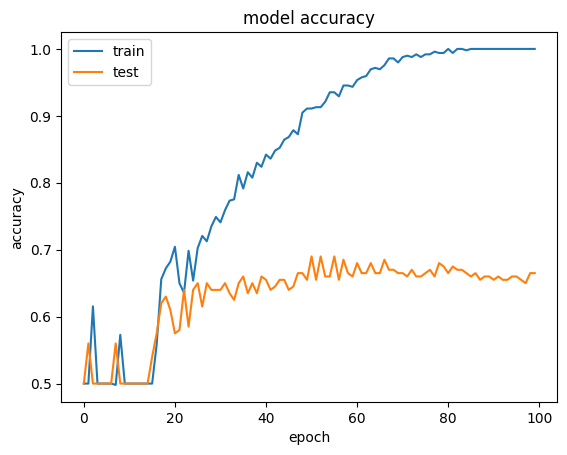

In [6]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'evaluation'], loc='upper left')
plt.show()

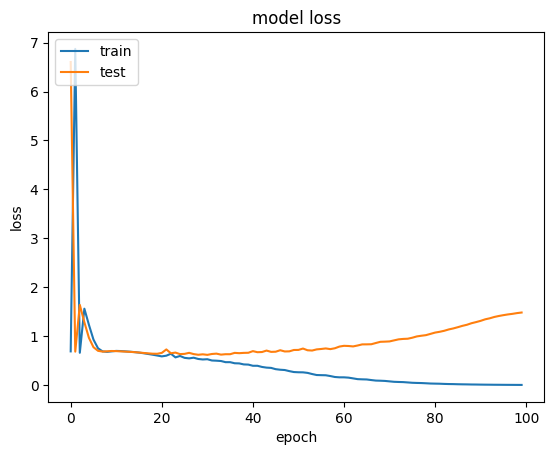

In [7]:
# summarize history for loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'evaluation'], loc='upper left')
plt.show()

In [24]:
metrics_test = model.evaluate(test)
metrics_train = model.evaluate(train)

print(f"TRAIN_SET: {metrics_train}")
print("--------------------------------------------")
print(f"TEST_SET: {metrics_test}")
print("--------------------------------------------")


1/1 [==============================] - 3s 3s/step - loss: 0.0049 - accuracy: 1.0000
TRAIN_SET: [0.0048927851021289825, 1.0]
--------------------------------------------
TEST_SET: [1.3892724514007568, 0.6850000023841858]
--------------------------------------------


In [55]:
y_test=(model.predict(validation) > 0.5).astype("int32")
predic= (model.predict(test) > 0.5).astype("int32")


1/1 [==============================] - 1s 1s/step


In [62]:
'''from sklearn.metrics import classification_report, confusion_matrix


# get predict prob and label .
ypred = model.predict(train, verbose=1)
ypred = np.argmax(ypred, axis=1)

print(classification_report(np.argmax(ytrain, axis=1), ypred))'''


'from sklearn.metrics import classification_report, confusion_matrix\n\n\n# get predict prob and label .\nypred = model.predict(train, verbose=1)\nypred = np.argmax(ypred, axis=1)\n\nprint(classification_report(np.argmax(ytrain, axis=1), ypred))'

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predic)
print(cm)

[[52 45]
 [53 50]]


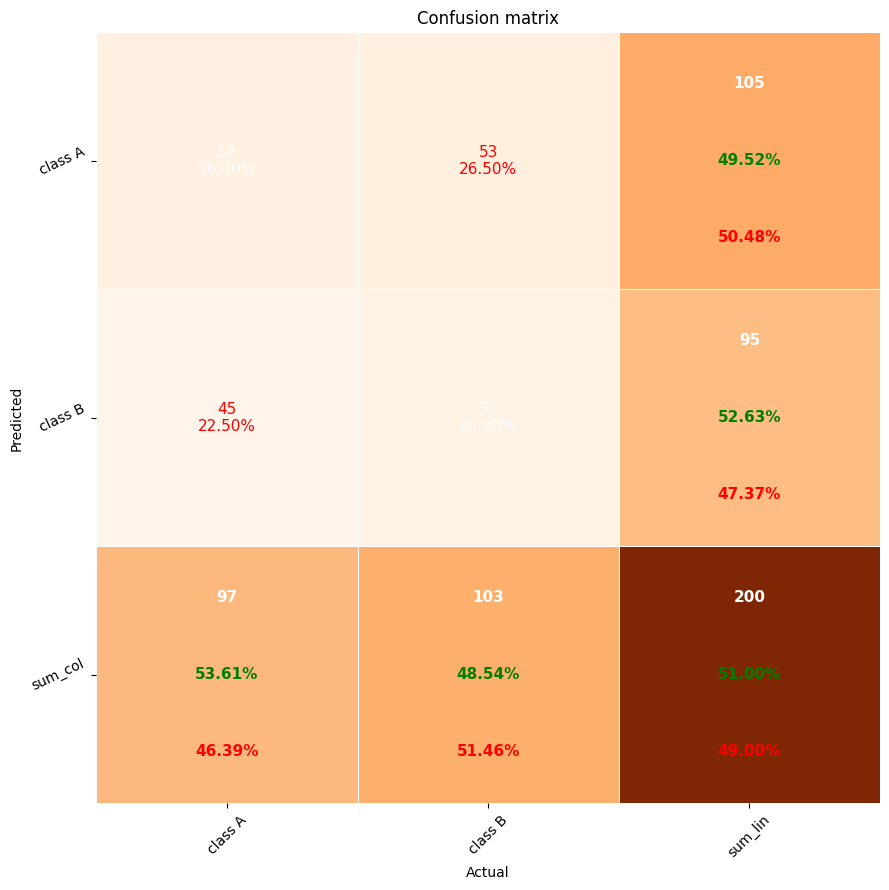

In [58]:
import numpy as np
from pretty_confusion_matrix import pp_matrix_from_data

pp_matrix_from_data(y_test, predic)